## 📌 Holiday Package Prediction — Project Overview

## 🧩 Problem Statement
The goal of this project is to use the **Gradient Boosting Classifier** to predict which customers are likely to purchase a "Wellness Tourism Package" offered by "Tips & Travel.com." By accurately identifying potential buyers, the company can target its marketing efforts more effectively, improving the conversion rate from last year's 18%.

---

## 📊 Dataset Information

## 🏷️ Dataset Name  
Travel Package Purchase Dataset (Travel.csv)

## 🌐 Source  
Internal Marketing Data / Tips & Travel.com

---

## 📐 Dataset Shape
- **Total Records:** 4,888  
- **Total Features:** 18 (After initial cleaning)

---

## 🧬 Dataset Columns
- **ProdTaken** – **Target Label** (1: Bought, 0: Not Bought)
- **Age** – Customer's age
- **TypeofContact** – How the customer was reached (Self Enquiry/Company Invited)
- **CityTier** – City classification (1, 2, or 3)
- **DurationOfPitch** – Time spent pitching the package
- **Gender** – Male/Female
- **NumberOfPersonVisiting** – Total number of people traveling
- **NumberOfFollowups** – Total follow-up calls made
- **ProductPitched** – Specific package offered (Basic, Deluxe, etc.)
- **PreferredPropertyStar** – Hotel rating preference (3, 4, 5)
- **MaritalStatus** – Married, Single, Divorced, etc.
- **NumberOfTrips** – Average annual trips
- **Passport** – Possession of a passport (1: Yes, 0: No)
- **PitchSatisfactionScore** – Satisfaction score from the pitch session
- **OwnCar** – Car ownership status
- **NumberOfChildrenVisiting** – Number of children in the travel group
- **Designation** – Professional level (Manager, Executive, etc.)
- **MonthlyIncome** – Monthly salary of the customer

---

## 🎯 Features and Target

## 🔹 Features (X)
We use demographic, financial, and behavioral features like **Age, MonthlyIncome, Passport status, and NumberOfFollowups**.

## 🎯 Target (y)
- **ProdTaken** (Binary: 0 or 1)

---

## 📚 Steps Performed in the Notebook

1. **Environment Setup:** Importing `Pandas`, `NumPy`, `Seaborn`, `Matplotlib`, and `Plotly`.
2. **Data Preprocessing:** - Dropping non-essential columns like `CustomerID` and `Occupation`.
   - Handling missing values in numeric and categorical columns.
   - Fixing data entry errors (e.g., merging 'Fe Male' into 'Female').
3. **Feature Engineering:** Scaling numerical data and encoding categories.
4. **Model Training:** Training the **Gradient Boosting Classifier**.
5. **Evaluation:** Assessing performance using **Classification Reports** (Precision, Recall, F1-Score) on scaled training and test data.
6. **Deployment Prep:** Saving the model using `joblib`.

---

## Gradient Boosting Classifier 

### Load the dataset 

In [1]:
# import the requirement library 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings 
warnings.filterwarnings('ignore')
import plotly.express as px

%matplotlib inline 

In [2]:
## Load the dataset 
data=pd.read_csv('Travel.csv')
data.head()

,CustomerID,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,200000,1,41.0,Self Enquiry,3,6.0,Salaried,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,200001,0,49.0,Company Invited,1,14.0,Salaried,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,200002,1,37.0,Self Enquiry,1,8.0,Free Lancer,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,200003,0,33.0,Company Invited,1,9.0,Salaried,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,200004,0,NaN,Self Enquiry,1,8.0,Small Business,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [3]:
## Checking the null value 
## Remove the unnesassiry columns 
data.drop('CustomerID',axis=1,inplace=True)
data.drop('Occupation',axis=1,inplace=True)
data.isnull().sum()

ProdTaken                     0
Age                         226
TypeofContact                25
CityTier                      0
DurationOfPitch             251
Gender                        0
NumberOfPersonVisiting        0
NumberOfFollowups            45
ProductPitched                0
PreferredPropertyStar        26
MaritalStatus                 0
NumberOfTrips               140
Passport                      0
PitchSatisfactionScore        0
OwnCar                        0
NumberOfChildrenVisiting     66
Designation                   0
MonthlyIncome               233
dtype: int64

In [4]:
null_column=[]
for i in data.columns:
    if data[i].isnull().sum()!=0:
        null_column.append(i)

In [5]:
null_column

['Age',
 'TypeofContact',
 'DurationOfPitch',
 'NumberOfFollowups',
 'PreferredPropertyStar',
 'NumberOfTrips',
 'NumberOfChildrenVisiting',
 'MonthlyIncome']

In [6]:
data.dtypes


ProdTaken                     int64
Age                         float64
TypeofContact                object
CityTier                      int64
DurationOfPitch             float64
Gender                       object
NumberOfPersonVisiting        int64
NumberOfFollowups           float64
ProductPitched               object
PreferredPropertyStar       float64
MaritalStatus                object
NumberOfTrips               float64
Passport                      int64
PitchSatisfactionScore        int64
OwnCar                        int64
NumberOfChildrenVisiting    float64
Designation                  object
MonthlyIncome               float64
dtype: object

In [7]:
## Handling the miss categorical Name 
print(data['Gender'].value_counts())
data['Gender']=data['Gender'].replace('Fe Male' , 'Female')
data['Gender'].value_counts()

Gender
Male       2916
Female     1817
Fe Male     155
Name: count, dtype: int64


Gender
Male      2916
Female    1972
Name: count, dtype: int64

In [8]:
data.columns

Index(['ProdTaken', 'Age', 'TypeofContact', 'CityTier', 'DurationOfPitch',
       'Gender', 'NumberOfPersonVisiting', 'NumberOfFollowups',
       'ProductPitched', 'PreferredPropertyStar', 'MaritalStatus',
       'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar',
       'NumberOfChildrenVisiting', 'Designation', 'MonthlyIncome'],
      dtype='object')

In [9]:
## Checing the wrong data present here in the dataset for each columns 

for i in data.columns:
    print('value count for this column ======',i)
    print(data[i].value_counts())
    print('='*50)

value count for this column ====== ProdTaken
ProdTaken
0    3968
1     920
Name: count, dtype: int64
value count for this column ====== Age
Age
35.0    237
36.0    231
34.0    211
31.0    203
30.0    199
32.0    197
33.0    189
37.0    185
29.0    178
38.0    176
41.0    155
39.0    150
28.0    147
40.0    146
42.0    142
27.0    138
43.0    130
46.0    121
45.0    116
26.0    106
44.0    105
51.0     90
47.0     88
50.0     86
25.0     74
52.0     68
53.0     66
49.0     65
48.0     65
55.0     64
54.0     61
56.0     58
24.0     56
23.0     46
22.0     46
59.0     44
21.0     41
20.0     38
19.0     32
58.0     31
57.0     29
60.0     29
18.0     14
61.0      9
Name: count, dtype: int64
value count for this column ====== TypeofContact
TypeofContact
Self Enquiry       3444
Company Invited    1419
Name: count, dtype: int64
value count for this column ====== CityTier
CityTier
1    3190
3    1500
2     198
Name: count, dtype: int64
value count for this column ====== DurationOfPitch
Durat

In [10]:
numeric=[]
catogric=[]
for i in null_column:
    if data[i].dtypes == 'int64' or data[i].dtypes == 'float64':
        numeric.append(i)
    else:
        catogric.append(i)

In [11]:
data.describe()

,ProdTaken,Age,CityTier,DurationOfPitch,NumberOfPersonVisiting,NumberOfFollowups,PreferredPropertyStar,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,MonthlyIncome
count,4888.000000,4662.000000,4888.000000,4637.000000,4888.000000,4843.000000,4862.000000,4748.000000,4888.000000,4888.000000,4888.000000,4822.000000,4655.000000
mean,0.188216,37.622265,1.654255,15.490835,2.905074,3.708445,3.581037,3.236521,0.290917,3.078151,0.620295,1.187267,23619.853491
std,0.390925,9.316387,0.916583,8.519643,0.724891,1.002509,0.798009,1.849019,0.454232,1.365792,0.485363,0.857861,5380.698361
min,0.000000,18.000000,1.000000,5.000000,1.000000,1.000000,3.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1000.000000
25%,0.000000,31.000000,1.000000,9.000000,2.000000,3.000000,3.000000,2.000000,0.000000,2.000000,0.000000,1.000000,20346.000000
50%,0.000000,36.000000,1.000000,13.000000,3.000000,4.000000,3.000000,3.000000,0.000000,3.000000,1.000000,1.000000,22347.000000
75%,0.000000,44.000000,3.000000,20.000000,3.000000,4.000000,4.000000,4.000000,1.000000,4.000000,1.000000,2.000000,25571.000000
max,1.000000,61.000000,3.000000,127.000000,5.000000,6.000000,5.000000,22.000000,1.000000,5.000000,1.000000,3.000000,98678.000000


In [12]:
numeric

['Age',
 'DurationOfPitch',
 'NumberOfFollowups',
 'PreferredPropertyStar',
 'NumberOfTrips',
 'NumberOfChildrenVisiting',
 'MonthlyIncome']

In [13]:
catogric

['TypeofContact']

In [14]:
## Handling the missing value for the Numerical values 
# TO fill the Numerical value to the mean to fill it 

data['Age']=data['Age'].fillna(data['Age'].mean())
data['DurationOfPitch']=data['DurationOfPitch'].fillna(data['DurationOfPitch'].mean())
data['NumberOfFollowups']=data['NumberOfFollowups'].fillna(data['NumberOfFollowups'].mean())
data['PreferredPropertyStar']=data['PreferredPropertyStar'].fillna(data['PreferredPropertyStar'].mean())
data['NumberOfTrips']=data['NumberOfTrips'].fillna(data['NumberOfTrips'].mean())
data['NumberOfChildrenVisiting']=data['NumberOfChildrenVisiting'].fillna(data['NumberOfChildrenVisiting'].mean())
data['MonthlyIncome']=data['MonthlyIncome'].fillna(data['MonthlyIncome'].mean())

In [15]:
data.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,1,41.000000,Self Enquiry,3,6.0,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,0,49.000000,Company Invited,1,14.0,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,1,37.000000,Self Enquiry,1,8.0,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,0,33.000000,Company Invited,1,9.0,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,0,37.622265,Self Enquiry,1,8.0,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [16]:
## Handling the categorical value for the dataset 
## We have to Fill the mode of the value  to fill it the NAN value

data['TypeofContact']=data['TypeofContact'].fillna(data['TypeofContact'].mode()[0])

In [17]:
data.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,1,41.000000,Self Enquiry,3,6.0,Female,3,3.0,Deluxe,3.0,Single,1.0,1,2,1,0.0,Manager,20993.0
1,0,49.000000,Company Invited,1,14.0,Male,3,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,2.0,Manager,20130.0
2,1,37.000000,Self Enquiry,1,8.0,Male,3,4.0,Basic,3.0,Single,7.0,1,3,0,0.0,Executive,17090.0
3,0,33.000000,Company Invited,1,9.0,Female,2,3.0,Basic,3.0,Divorced,2.0,1,5,1,1.0,Executive,17909.0
4,0,37.622265,Self Enquiry,1,8.0,Male,2,3.0,Basic,4.0,Divorced,1.0,0,5,1,0.0,Executive,18468.0


In [18]:
## #checking the Null value are present in the dataset 
data.isnull().sum()

ProdTaken                   0
Age                         0
TypeofContact               0
CityTier                    0
DurationOfPitch             0
Gender                      0
NumberOfPersonVisiting      0
NumberOfFollowups           0
ProductPitched              0
PreferredPropertyStar       0
MaritalStatus               0
NumberOfTrips               0
Passport                    0
PitchSatisfactionScore      0
OwnCar                      0
NumberOfChildrenVisiting    0
Designation                 0
MonthlyIncome               0
dtype: int64

In [19]:
data.dtypes

ProdTaken                     int64
Age                         float64
TypeofContact                object
CityTier                      int64
DurationOfPitch             float64
Gender                       object
NumberOfPersonVisiting        int64
NumberOfFollowups           float64
ProductPitched               object
PreferredPropertyStar       float64
MaritalStatus                object
NumberOfTrips               float64
Passport                      int64
PitchSatisfactionScore        int64
OwnCar                        int64
NumberOfChildrenVisiting    float64
Designation                  object
MonthlyIncome               float64
dtype: object

In [20]:
## Features Engineering 
## Create new column for feature
data['TotalVisiting']=data['NumberOfPersonVisiting'] + data['NumberOfChildrenVisiting']
data.drop(columns=['NumberOfPersonVisiting','NumberOfChildrenVisiting'])

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Gender,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,Designation,MonthlyIncome,TotalVisiting
0,1,41.000000,Self Enquiry,3,6.0,Female,3.0,Deluxe,3.0,Single,1.0,1,2,1,Manager,20993.0,3.0
1,0,49.000000,Company Invited,1,14.0,Male,4.0,Deluxe,4.0,Divorced,2.0,0,3,1,Manager,20130.0,5.0
2,1,37.000000,Self Enquiry,1,8.0,Male,4.0,Basic,3.0,Single,7.0,1,3,0,Executive,17090.0,3.0
3,0,33.000000,Company Invited,1,9.0,Female,3.0,Basic,3.0,Divorced,2.0,1,5,1,Executive,17909.0,3.0
4,0,37.622265,Self Enquiry,1,8.0,Male,3.0,Basic,4.0,Divorced,1.0,0,5,1,Executive,18468.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4883,1,49.000000,Self Enquiry,3,9.0,Male,5.0,Deluxe,4.0,Unmarried,2.0,1,1,1,Manager,26576.0,4.0
4884,1,28.000000,Company Invited,1,31.0,Male,5.0,Basic,3.0,Single,3.0,1,3,1,Executive,21212.0,6.0
4885,1,52.000000,Self Enquiry,3,17.0,Female,4.0,Standard,4.0,Married,7.0,0,1,1,Senior Manager,31820.0,7.0
4886,1,19.000000,Self Enquiry,3,16.0,Male,4.0,Basic,3.0,Single,3.0,0,5,0,Executive,20289.0,5.0


In [21]:
data['TypeofContact'].unique()

array(['Self Enquiry', 'Company Invited'], dtype=object)

In [22]:
from sklearn.preprocessing import LabelEncoder

In [23]:
l1=LabelEncoder()

In [24]:
data['TypeofContact']=l1.fit_transform(data['TypeofContact'])

In [25]:
cat=[]
for i in data.columns:
    if data[i].dtypes=='object':
        cat.append(i)

In [26]:
cat  # Catogerical Columns Name 

['Gender', 'ProductPitched', 'MaritalStatus', 'Designation']

In [27]:
for i in cat:
    data[i]=l1.fit_transform(data[i])

In [28]:
data.head()

,ProdTaken,Age,TypeofContact,CityTier,DurationOfPitch,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,TotalVisiting
0,1,41.000000,1,3,6.0,0,3,3.0,1,3.0,2,1.0,1,2,1,0.0,2,20993.0,3.0
1,0,49.000000,0,1,14.0,1,3,4.0,1,4.0,0,2.0,0,3,1,2.0,2,20130.0,5.0
2,1,37.000000,1,1,8.0,1,3,4.0,0,3.0,2,7.0,1,3,0,0.0,1,17090.0,3.0
3,0,33.000000,0,1,9.0,0,2,3.0,0,3.0,0,2.0,1,5,1,1.0,1,17909.0,3.0
4,0,37.622265,1,1,8.0,1,2,3.0,0,4.0,0,1.0,0,5,1,0.0,1,18468.0,2.0


In [29]:
x=data.drop('OwnCar',axis=1)
y=data['OwnCar']

<Axes: >

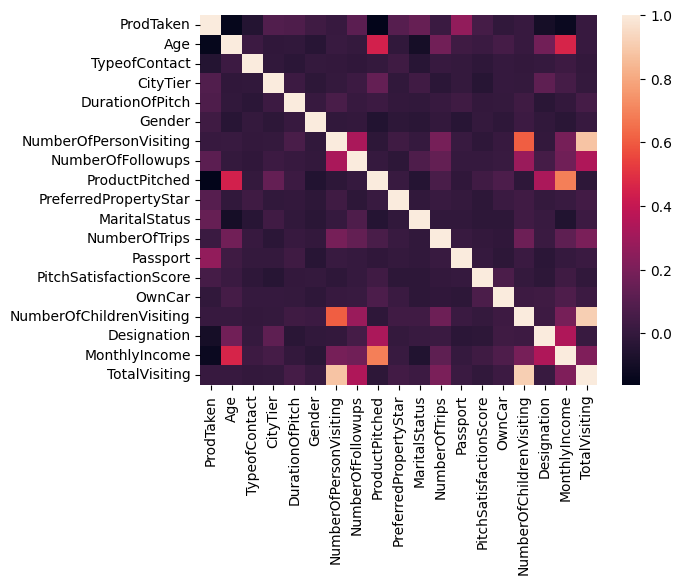

In [42]:
sns.heatmap(data.corr())

In [43]:
### Split the dataset in train and test 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)


In [49]:
from sklearn.ensemble import GradientBoostingClassifier

In [50]:
gr=GradientBoostingClassifier()

In [51]:
gr.fit(x_train,y_train)

,loss,'log_loss'
,learning_rate,0.1
,n_estimators,100
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


In [53]:
## Check the performeance 
from sklearn.metrics import confusion_matrix,classification_report

In [54]:
y_pred_test=gr.predict(x_test)
y_pred_train=gr.predict(x_train)

In [55]:
print(classification_report(y_pred_test,y_test))
print('='*90)
print(classification_report(y_pred_train,y_train))

              precision    recall  f1-score   support

           0       0.11      0.46      0.18       111
           1       0.92      0.63      0.75      1111

    accuracy                           0.62      1222
   macro avg       0.52      0.55      0.47      1222
weighted avg       0.85      0.62      0.70      1222

              precision    recall  f1-score   support

           0       0.21      0.77      0.33       382
           1       0.96      0.66      0.78      3284

    accuracy                           0.67      3666
   macro avg       0.59      0.72      0.56      3666
weighted avg       0.88      0.67      0.74      3666



<Axes: >

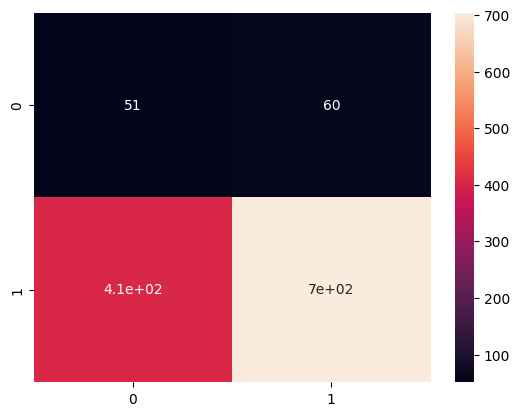

In [59]:
sns.heatmap(confusion_matrix(y_pred_test,y_test),annot=True)


<Axes: >

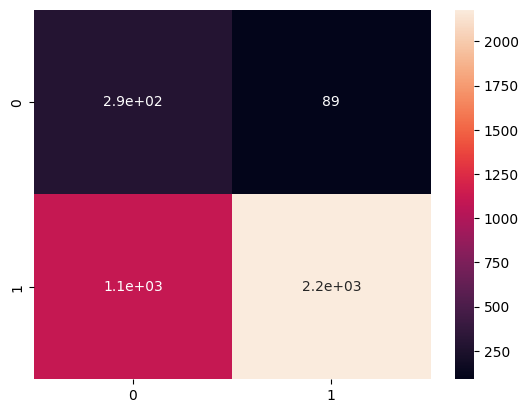

In [60]:
sns.heatmap(confusion_matrix(y_pred_train,y_train),annot=True)

In [78]:
## Hyper parameter
gd_param={
    'loss':['log_loss', 'exponential'],
    'learning_rate':[0.001,0.01,0.1,1.0,10.0],
    'criterion':['friedman_mse', 'squared_error'],
    'max_features':['log2','sqrt'],
   
}

In [79]:
gd_param

{'loss': ['log_loss', 'exponential'],
 'learning_rate': [0.001, 0.01, 0.1, 1.0, 10.0],
 'criterion': ['friedman_mse', 'squared_error'],
 'max_features': ['log2', 'sqrt']}

In [80]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [81]:
rdm=RandomizedSearchCV(estimator=gr,
                 param_distributions=gd_param,
                 cv=5,
                 verbose=3,
                 n_jobs=-1,
                )

In [82]:
rdm.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END criterion=friedman_mse, learning_rate=0.01, loss=exponential, max_features=sqrt;, score=0.619 total time=   0.6s
[CV 2/5] END criterion=friedman_mse, learning_rate=0.01, loss=exponential, max_features=sqrt;, score=0.618 total time=   0.6s
[CV 3/5] END criterion=friedman_mse, learning_rate=0.01, loss=exponential, max_features=sqrt;, score=0.618 total time=   0.6s
[CV 4/5] END criterion=friedman_mse, learning_rate=0.01, loss=exponential, max_features=sqrt;, score=0.619 total time=   0.6s
[CV 5/5] END criterion=friedman_mse, learning_rate=0.01, loss=exponential, max_features=sqrt;, score=0.619 total time=   0.6s
[CV 1/5] END criterion=friedman_mse, learning_rate=0.001, loss=exponential, max_features=log2;, score=0.619 total time=   0.6s
[CV 2/5] END criterion=friedman_mse, learning_rate=0.001, loss=exponential, max_features=log2;, score=0.618 total time=   0.6s
[CV 3/5] END criterion=friedman_mse, learning_rate=0.00

,estimator,GradientBoostingClassifier()
,param_distributions,"{'criterion': ['friedman_mse', 'squared_error'], 'learning_rate': [0.001, 0.01, ...], 'loss': ['log_loss', 'exponential'], 'max_features': ['log2', 'sqrt']}"
,n_iter,10
,scoring,None
,n_jobs,1
,refit,True
,cv,5
,verbose,3
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


In [84]:
rdm.best_params_

{'max_features': 'sqrt',
 'loss': 'exponential',
 'learning_rate': 0.1,
 'criterion': 'squared_error'}

In [85]:
## Retrain Model 
grd=GradientBoostingClassifier(max_features='sqrt',
                               loss='exponential',
                               learning_rate=0.01,
                               criterion='squared_error')

In [86]:
grd.fit(x_train,y_train)

,loss,'exponential'
,learning_rate,0.01
,n_estimators,100
,subsample,1.0
,criterion,'squared_error'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


In [111]:
# from sklearn.tree import plot_tree
# from sklearn.tree import DecisionTreeClassifier
# dt=DecisionTreeClassifier()
# dt.fit(x_train,y_train)
# plot_tree(dt)

In [87]:
## Prediction the accuracy after the retrain the model 
y_pred_test=grd.predict(x_test)
y_pred_train=grd.predict(x_train)
print(classification_report(y_pred_train,y_train))
print('='*89)
print(classification_report(y_pred_test,y_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.62      0.76      3666

    accuracy                           0.62      3666
   macro avg       0.50      0.31      0.38      3666
weighted avg       1.00      0.62      0.76      3666

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.63      0.77      1222

    accuracy                           0.63      1222
   macro avg       0.50      0.31      0.38      1222
weighted avg       1.00      0.63      0.77      1222



In [91]:
## Save this model 


In [93]:
## After the Scalling the data then the retrain the model 
from sklearn.preprocessing import StandardScaler

In [94]:
sd=StandardScaler()

In [98]:
x_train_scaler=sd.fit_transform(x_train)
x_test_scaler=sd.fit_transform(x_test)

In [105]:
pd.DataFrame(x_train_scaler).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,2.06390,-0.717277,0.645397,-0.721708,-0.671767,-1.233418,0.135533,0.280392,-0.928337,1.776068,1.854954,2.050269,1.575272,0.681958,-0.215437,-0.767175,-0.427996,-0.060721
1,-0.48452,0.017569,-1.549433,-0.721708,-0.182788,-1.233418,-1.248489,-0.721723,-0.141269,-0.730494,-0.294647,-0.673884,-0.634811,1.409353,-0.215437,0.282252,0.005578,-0.769821
2,2.06390,-0.051482,0.645397,-0.721708,-0.000542,-1.233418,0.135533,1.282506,-0.141269,0.522787,-1.369447,1.505438,-0.634811,0.681958,-1.389108,0.282252,-0.723642,-0.769821
3,-0.48452,0.614314,0.645397,1.454995,-0.549522,0.810755,0.135533,0.280392,-0.141269,1.776068,1.854954,-0.673884,-0.634811,1.409353,-0.215437,0.282252,0.046024,-0.060721
4,2.06390,-1.050175,0.645397,-0.721708,0.306191,-1.233418,0.135533,-0.721723,-0.928337,-0.730494,-0.294647,-0.673884,1.575272,0.681958,-0.215437,-0.767175,-1.152879,-0.060721


In [106]:
grds=GradientBoostingClassifier()
grds.fit(x_train_scaler,y_train)

,loss,'log_loss'
,learning_rate,0.1
,n_estimators,100
,subsample,1.0
,criterion,'friedman_mse'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


In [107]:
y_pred_scale_train=grds.predict(x_train_scaler)
y_pred_scale_test=grds.predict(x_test_scaler)

print(classification_report(y_pred_scale_train,y_train))
print('='*90)
print(classification_report(y_pred_scale_test,y_test))


              precision    recall  f1-score   support

           0       0.21      0.77      0.33       382
           1       0.96      0.66      0.78      3284

    accuracy                           0.67      3666
   macro avg       0.59      0.72      0.56      3666
weighted avg       0.88      0.67      0.74      3666

              precision    recall  f1-score   support

           0       0.13      0.48      0.20       123
           1       0.92      0.64      0.75      1099

    accuracy                           0.62      1222
   macro avg       0.52      0.56      0.48      1222
weighted avg       0.84      0.62      0.70      1222



In [108]:
# using the hyperparameter 
hgrds=GradientBoostingClassifier(max_features='sqrt',
                               loss='exponential',
                               learning_rate=0.01,
                               criterion='squared_error')

In [109]:
hgrds.fit(x_train_scaler,y_train)

,loss,'exponential'
,learning_rate,0.01
,n_estimators,100
,subsample,1.0
,criterion,'squared_error'
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_depth,3
,min_impurity_decrease,0.0
,init,None


In [110]:
y_pred_scale_train=hgrds.predict(x_train_scaler)
y_pred_scale_test=hgrds.predict(x_test_scaler)

print(classification_report(y_pred_scale_train,y_train))
print('='*90)
print(classification_report(y_pred_scale_test,y_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.62      0.76      3666

    accuracy                           0.62      3666
   macro avg       0.50      0.31      0.38      3666
weighted avg       1.00      0.62      0.76      3666

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.63      0.77      1222

    accuracy                           0.63      1222
   macro avg       0.50      0.31      0.38      1222
weighted avg       1.00      0.63      0.77      1222



In [117]:
import joblib